In [14]:
import numpy as np

# Function to generate matrices and save them to a txt file
def generate_matrices_no_multiplication(filename, sizes):
    with open(filename, 'w') as f:
        for size in sizes:
            # Square matrix A (10^i x 10^i)
            A = np.random.randint(1, 100, (size, size))
            f.write(f"Matrix A ({size}x{size}):\n")
            np.savetxt(f, A, fmt='%d')
            f.write("\n\n")

            # Square matrix B (10^i x 10^i)
            B = np.random.randint(1, 100, (size, size))
            f.write(f"Matrix B ({size}x{size}):\n")
            np.savetxt(f, B, fmt='%d')
            f.write("\n\n")

            # Non-square matrix A (10^i x 10^i-1)
            if size > 1:
                A = np.random.randint(1, 100, (size, size-50))
                f.write(f"Matrix A ({size}x{size-50}):\n")
                np.savetxt(f, A, fmt='%d')
                f.write("\n\n")

                # Non-square matrix B (10^i-1 x 10^i)
                B = np.random.randint(1, 100, (size-50, size))
                f.write(f"Matrix B ({size-50}x{size}):\n")
                np.savetxt(f, B, fmt='%d')
                f.write("\n\n")

# Orders of magnitude up to 10^5
sizes = [10*(i*10) for i in range(1, 5)]

# Generating and saving matrices for each order of magnitude
generate_matrices_no_multiplication("dataset_matrices.txt", sizes)


# multiplicar

In [5]:
import time

# Function to multiply two matrices
def multiply_matrices(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

# Function to read matrices from the file and multiply them
def multiply_and_time_matrices(input_filename, output_filename):
    with open(input_filename, 'r') as infile, open(output_filename, 'w') as outfile:
        lines = infile.readlines()
        i = 0
        while i < len(lines):
            if "Matrix A" in lines[i]:
                # Extract the matrix size, ensuring to remove extra characters like ':'
                size_A = tuple(map(int, lines[i].split()[2].strip('():').split('x')))
                A = []
                i += 1
                while lines[i].strip() != "":
                    A.append(list(map(int, lines[i].split())))
                    i += 1

                i += 2  # Skip empty line and Matrix B header

                size_B = tuple(map(int, lines[i].split()[2].strip('():').split('x')))
                B = []
                i += 1
                while i < len(lines) and lines[i].strip() != "":
                    B.append(list(map(int, lines[i].split())))
                    i += 1

                i += 2  # Skip empty lines

                # Measure multiplication time
                start_time = time.time()
                result = multiply_matrices(A, B)
                end_time = time.time()

                # Calculate elapsed time
                elapsed_time = end_time - start_time

                # Write results to output file
                outfile.write(f"Order of Matrices: A{size_A} x B{size_B}\n")
                outfile.write(f"Time taken: {elapsed_time:.6f} seconds\n\n")

# Generating and saving the multiplication times for each order of magnitude
multiply_and_time_matrices("dataset_matrices.txt", "multiplication_times.txt")


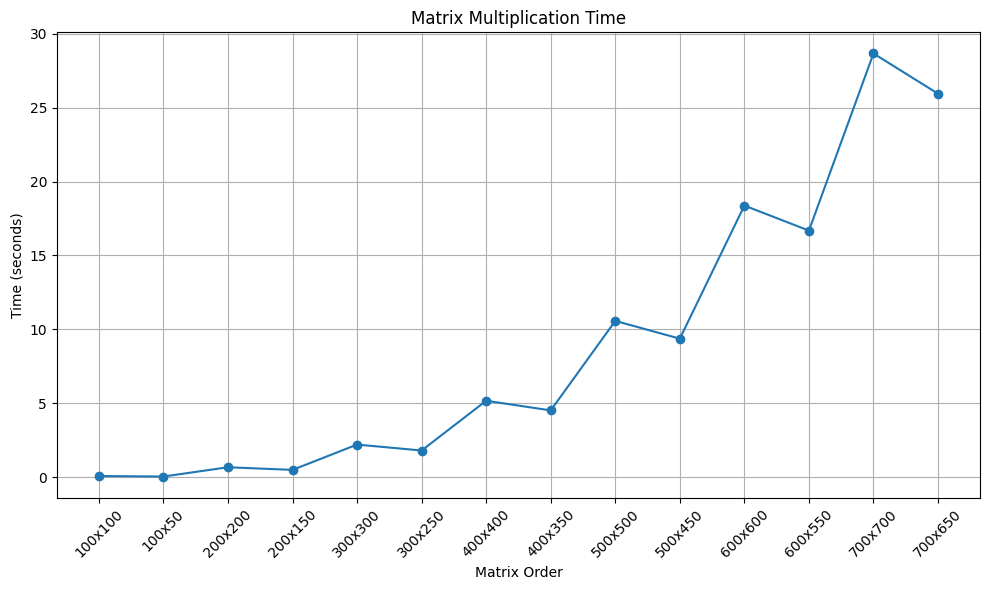

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Función para leer el archivo y extraer los datos
def read_data(file_path="multiplication_times.txt"):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 3):
            order_line = lines[i].strip()
            time_line = lines[i+1].strip()

            # Extraer dimensiones de las matrices
            order_match = re.search(r"A\((\d+), (\d+)\) x B\((\d+), (\d+)\)", order_line)
            if order_match:
                rows_A = int(order_match.group(1))
                cols_A = int(order_match.group(2))
                rows_B = int(order_match.group(3))
                cols_B = int(order_match.group(4))

            # Extraer tiempo de ejecución
            time_taken = float(time_line.split(": ")[1].split()[0])

            data.append({
                'Order_A': f"{rows_A}x{cols_A}",
                'Order_B': f"{rows_B}x{cols_B}",
                'Rows_A': rows_A,
                'Cols_A': cols_A,
                'Rows_B': rows_B,
                'Cols_B': cols_B,
                'Time_Taken': time_taken
            })

    return pd.DataFrame(data)

# Leer el archivo de texto
df = read_data("multiplication_times.txt")

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['Order_A'], df['Time_Taken'], marker='o', linestyle='-')
plt.xlabel("Matrix Order")
plt.ylabel("Time (seconds)")
plt.title("Matrix Multiplication Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Traspuesta

In [8]:
import time

# Function to transpose a matrix
def transpose_matrix(matrix):
    rows, cols = len(matrix), len(matrix[0])
    transposed = [[0 for _ in range(rows)] for _ in range(cols)]

    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]

    return transposed

# Function to multiply two matrices using the transpose method
def multiply_matrices_with_transpose(A, B):
    B_T = transpose_matrix(B)
    result = [[0 for _ in range(len(B_T))] for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B_T)):
            for k in range(len(A[0])):  # or len(B)
                result[i][j] += A[i][k] * B_T[j][k]

    return result

# Function to read matrices from the file and multiply them
def multiply_and_time_matrices_with_transpose(input_filename, output_filename):
    with open(input_filename, 'r') as infile, open(output_filename, 'w') as outfile:
        lines = infile.readlines()
        i = 0
        while i < len(lines):
            if "Matrix A" in lines[i]:
                # Extract the matrix size, ensuring to remove extra characters like ':'
                size_A = tuple(map(int, lines[i].split()[2].strip('():').split('x')))
                A = []
                i += 1
                while lines[i].strip() != "":
                    A.append(list(map(int, lines[i].split())))
                    i += 1

                i += 2  # Skip empty line and Matrix B header

                size_B = tuple(map(int, lines[i].split()[2].strip('():').split('x')))
                B = []
                i += 1
                while i < len(lines) and lines[i].strip() != "":
                    B.append(list(map(int, lines[i].split())))
                    i += 1

                i += 2  # Skip empty lines

                # Measure multiplication time using the transpose method
                start_time = time.time()
                result = multiply_matrices_with_transpose(A, B)
                end_time = time.time()

                # Calculate elapsed time
                elapsed_time = end_time - start_time

                # Write results to output file
                outfile.write(f"Order of Matrices (with Transpose): A{size_A} x B{size_B}\n")
                outfile.write(f"Time taken: {elapsed_time:.6f} seconds\n\n")

# Generating and saving the multiplication times for each order of magnitude
multiply_and_time_matrices_with_transpose("dataset_matrices.txt", "multiplication_times_transpose.txt")


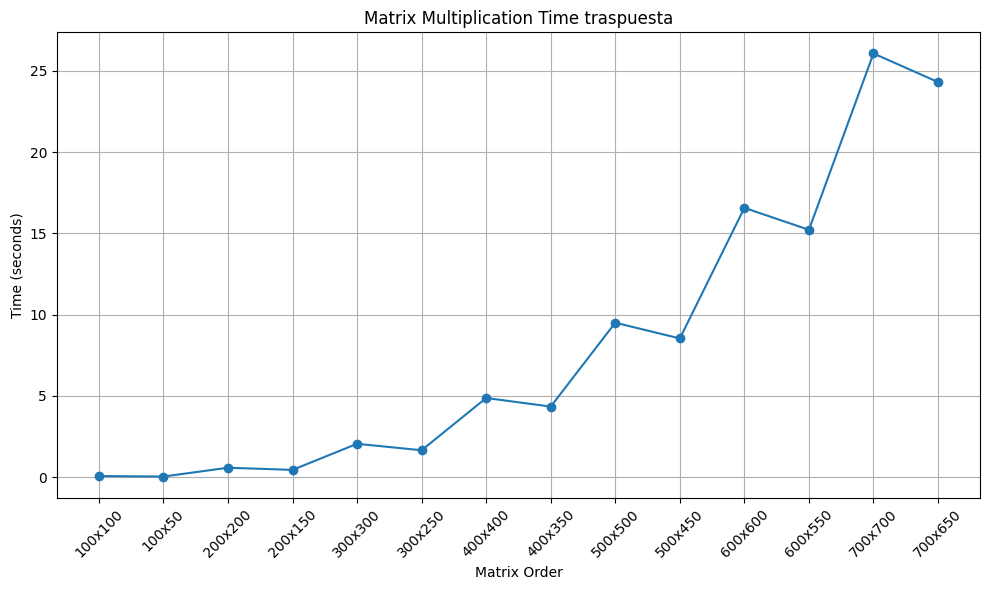

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Función para leer el archivo y extraer los datos
def read_data(file_path="multiplication_times_transpose.txt"):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 3):
            order_line = lines[i].strip()
            time_line = lines[i+1].strip()

            # Extraer dimensiones de las matrices
            order_match = re.search(r"A\((\d+), (\d+)\) x B\((\d+), (\d+)\)", order_line)
            if order_match:
                rows_A = int(order_match.group(1))
                cols_A = int(order_match.group(2))
                rows_B = int(order_match.group(3))
                cols_B = int(order_match.group(4))

            # Extraer tiempo de ejecución
            time_taken = float(time_line.split(": ")[1].split()[0])

            data.append({
                'Order_A': f"{rows_A}x{cols_A}",
                'Order_B': f"{rows_B}x{cols_B}",
                'Rows_A': rows_A,
                'Cols_A': cols_A,
                'Rows_B': rows_B,
                'Cols_B': cols_B,
                'Time_Taken': time_taken
            })

    return pd.DataFrame(data)

# Leer el archivo de texto
df = read_data("multiplication_times_transpose.txt")

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['Order_A'], df['Time_Taken'], marker='o', linestyle='-')
plt.xlabel("Matrix Order")
plt.ylabel("Time (seconds)")
plt.title("Matrix Multiplication Time traspuesta")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Strassen


In [16]:
import numpy as np
import time

def strassen(A, B):
    n = A.shape[0]

    # base case: 1x1 matrix
    if n == 1:
        return A * B
    else:
        # split input matrices into quarters
        mid = n // 2
        A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
        B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

        # calculate p1 to p7
        P1 = strassen(A11 + A22, B11 + B22)
        P2 = strassen(A21 + A22, B11)
        P3 = strassen(A11, B12 - B22)
        P4 = strassen(A22, B21 - B11)
        P5 = strassen(A11 + A12, B22)
        P6 = strassen(A21 - A11, B11 + B12)
        P7 = strassen(A12 - A22, B21 + B22)

        # calculate the 4 quarters of the resulting matrix
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 + P3 - P2 + P6

        # combine the 4 quarters into a single result matrix
        C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

        return C

def read_matrix_from_file(file, rows, cols):
    matrix = []
    for _ in range(rows):
        line = file.readline().strip()
        row = list(map(int, line.split()))
        matrix.append(row)
    return np.array(matrix)

def main():
    output_file = "multiplication_times_strassen.txt"
    with open(output_file, "w") as time_file:
        # Open the dataset file
        with open("dataset_matrices.txt", "r") as f:
            while True:
                line = f.readline()
                if not line:
                    break

                if "Matrix A" in line:
                    # Parse matrix A dimensions
                    dimensions = line.strip().split("(")[1].split(")")[0]
                    rows_A, cols_A = map(int, dimensions.split("x"))

                    # Read matrix A
                    A = read_matrix_from_file(f, rows_A, cols_A)
                    f.readline()  # Skip empty line

                if "Matrix B" in line:
                    # Parse matrix B dimensions
                    dimensions = line.strip().split("(")[1].split(")")[0]
                    rows_B, cols_B = map(int, dimensions.split("x"))

                    # Read matrix B
                    B = read_matrix_from_file(f, rows_B, cols_B)
                    f.readline()  # Skip empty line

                    # Check if matrices need padding
                    max_size = max(A.shape[0], A.shape[1], B.shape[0], B.shape[1])
                    m = 1
                    while m < max_size:
                        m *= 2
                    A = np.pad(A, ((0, m - A.shape[0]), (0, m - A.shape[1])), mode='constant')
                    B = np.pad(B, ((0, m - B.shape[0]), (0, m - B.shape[1])), mode='constant')

                    # Perform Strassen's algorithm on matrices A and B
                    start_time = time.time()
                    C = strassen(A, B)
                    end_time = time.time()

                    # Calculate the execution time
                    exec_time = end_time - start_time

                    # Write the execution time to the file
                    time_file.write(f"Order of Matrices: A({rows_A}x{cols_A}) x B({rows_B}x{cols_B})\n")
                    time_file.write(f"Time taken: {exec_time:.6f} seconds\n\n")

if __name__ == "__main__":
    main()


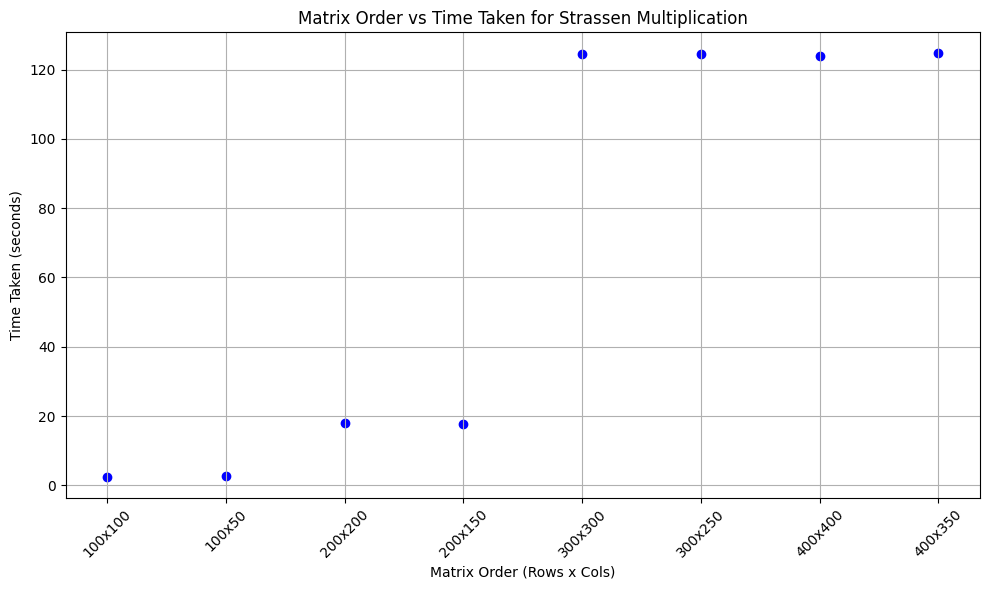

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Función para leer el archivo y extraer los datos
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 3):
            order_line = lines[i].strip()
            time_line = lines[i+1].strip()

            # Extraer dimensiones de las matrices
            order_match = re.search(r"A\((\d+)x(\d+)\) x B\((\d+)x(\d+)\)", order_line)
            if order_match:
                rows_A = int(order_match.group(1))
                cols_A = int(order_match.group(2))
                rows_B = int(order_match.group(3))
                cols_B = int(order_match.group(4))

                # Extraer tiempo de ejecución
                time_taken = float(time_line.split(": ")[1].split()[0])

                # Formato del label para el eje X
                label = f"{rows_A}x{cols_A}"

                data.append({
                    'Label': label,
                    'Time_Taken': time_taken
                })

    return pd.DataFrame(data)

# Ruta correcta del archivo subido
file_path = "multiplication_times_strassen.txt"

# Leer el archivo de texto
df = read_data(file_path)

# Creación del gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Label'], df['Time_Taken'], color='blue', marker='o')
plt.xlabel("Matrix Order (Rows x Cols)")
plt.ylabel("Time Taken (seconds)")
plt.title("Matrix Order vs Time Taken for Strassen Multiplication")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



